In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import os
from math import sqrt as sqrt
import numpy as np
import itertools
from torch.autograd import Function
import torch.nn.init as init
from ssd_project.model import ssd
from ssd_project.functions.detection import *
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
best_model = torch.load("../saved_models/BEST_model_ssd300.pth.tar")
model = ssd.build_ssd(num_classes = 4)
model.load_state_dict(best_model["model_state_dict"])
device = "cuda"
model = model.to(device)

In [3]:
epochs_trained = best_model["epoch"]
best_avg_loss = best_model["loss"]
t_loss_bvals = best_model["training_losses_batch_values"]
t_loss_bavgs = best_model["training_losses_batch_avgs"]
v_loss_bvals = best_model["validation_losses_batch_values"]
v_loss_bavgs = best_model["validation_losses_batch_avgs"]

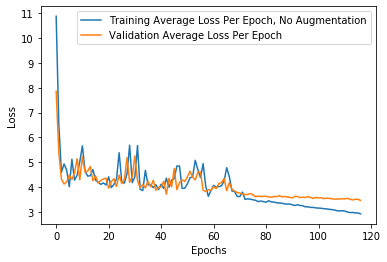

In [5]:
epochs_arr = list(range(epochs_trained+1))
plt.plot(epochs_arr, t_loss_bavgs, label = "Training Average Loss Per Epoch, No Augmentation")
plt.plot(epochs_arr, v_loss_bavgs, label = "Validation Average Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [8]:
min(t_loss_bavgs)

2.9214270572139793